In [22]:
 # Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

# Machine Learning
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [23]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [24]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [25]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [26]:
df_market_data.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [27]:
columns= df_market_data.columns
columns

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [28]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

# fit
scaler.fit(df_market_data)



StandardScaler()

In [30]:
# Create a DataFrame with the scaled data

scaled_data = scaler.transform(df_market_data)
df_scaled = pd.DataFrame(scaled_data, columns=columns)

df_scaled.index= df_market_data.index



# Set the coin_id column as index

#df_scaled.set_index('coin_id')
# Display the scaled DataFrame

df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [37]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [40]:
# Create an empty list to store the inertia values
inertia= []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    # initialize the model
    k_model = KMeans(n_clusters=i, random_state=1)
    
    # fit the model
    k_model.fit(df_scaled)
    
    # predict the model
    preds = k_model.predict(df_scaled)
    
    # evaluate the model (generate the metics)
    inertia.append(k_model.inertia_)
    #score = silhouette_score(df_scaled, preds)
    #silhouettes.append(score)
    
    #cha_cha = calinski_harabasz_score(df_scaled, preds)
    #cha_chas.append(cha_cha)
    
    print(f"Finished {i} out of {max(k)}")

Finished 1 out of 10
Finished 2 out of 10
Finished 3 out of 10
Finished 4 out of 10
Finished 5 out of 10
Finished 6 out of 10
Finished 7 out of 10
Finished 8 out of 10
Finished 9 out of 10
Finished 10 out of 10


In [45]:
# Create a dictionary with the data to plot the Elbow curve

elbow= {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow)

df_elbow.head(20)


,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051
5,6,61.634088
6,7,46.074467
7,8,43.392694
8,9,32.913223
9,10,30.469111


In [129]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow_plot= df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve Using PCA Data", xticks=df_elbow["k"])
elbow_plot

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:**  The best value for K is 4 as the graph is decreasing

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [47]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=3, random_state=1)

In [48]:
# Fit the K-Means model using the scaled DataFrame
model.fit(df_scaled)

KMeans(n_clusters=3, random_state=1)

In [49]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
# Make predictions
preds = model.predict(df_scaled)

# Print the resulting array of cluster values.


In [54]:
# Create a copy of the scaled DataFrame
df_sub2 = df_scaled.copy()

In [55]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters

df_sub2['clusters'] = preds


# Display the copy of the scaled DataFrame
df_sub2.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [144]:
# Create a scatter plot using hvPlot by setting87
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

initial_plot= df_sub2.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c='clusters',
    colorbar=True,
    title='Scatter Plot',
    xlabel='price_change_percentage_24h',
    ylabel='price_change_percentage_7d',
    hover_cols=['clusters'] )
initial_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,clusters)

---

### Optimize Clusters with Principal Component Analysis.

In [145]:
# Create a PCA model instance and set `n_components=3`.
n_components =3
pca=PCA(n_components=n_components)


In [70]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
# Fit the PCA model on the transformed credit card DataFrame
pca_data = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(pca_data, columns=["PCA_" + str(x) for x in range(1, n_components + 1)])
df_pca.index= df_market_data.index

# View the scaled PCA data
df_pca.head()

,PCA_1,PCA_2,PCA_3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


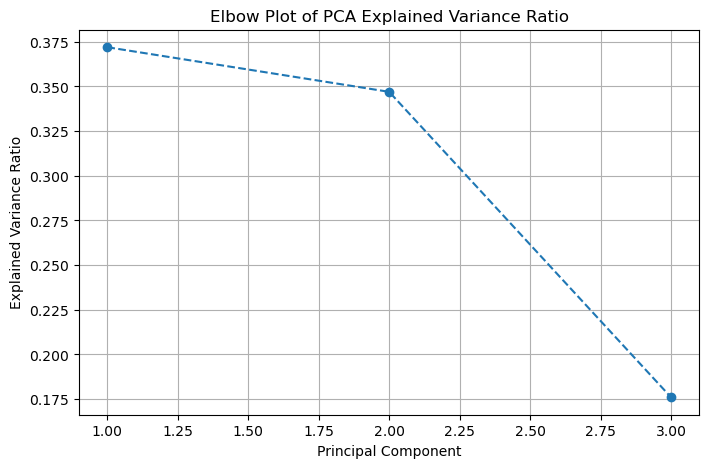

In [65]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.

explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame from the explained variance ratio
df2 = pd.DataFrame({
    'Principal Component': range(1, n_components + 1),
    'Explained Variance Ratio': explained_variance_ratio
})

# Plot the elbow plot
plt.figure(figsize=(8, 5))
plt.plot(df2['Principal Component'], df2['Explained Variance Ratio'], marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Elbow Plot of PCA Explained Variance Ratio')
plt.grid(True)
plt.show()


In [64]:
 sum(explained_variance_ratio)

0.8950316570309841

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total is almost 90% of variance

In [90]:
# Create a new DataFrame with the PCA data.


# Copy the crypto names from the original scaled DataFrame


# Set the coin_id column as index

#The DF was already created
# Display the scaled PCA DataFrame
df_pca.head()

,PCA_1,PCA_2,PCA_3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [91]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))


In [101]:

# Create an empty list to store the inertia values
inertia= []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    # initialize the model
    k_model = KMeans(n_clusters=i, random_state=1)
    
    # fit the model
    k_model.fit(df_pca)
    
    # predict the model
    preds = k_model.predict(df_pca)
    
    # evaluate the model (generate the metics)
    inertia.append(k_model.inertia_)
    
    print(f"Finished {i} out of {max(k)}")


Finished 1 out of 10
Finished 2 out of 10
Finished 3 out of 10
Finished 4 out of 10
Finished 5 out of 10
Finished 6 out of 10
Finished 7 out of 10
Finished 8 out of 10
Finished 9 out of 10
Finished 10 out of 10


In [124]:
# Create a dictionary with the data to plot the Elbow curve


elbow= {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow2 = pd.DataFrame(elbow)

df_elbow2.head(10)


,k,inertia
0,1,256.874086
1,2,182.339530
2,3,135.442408
3,4,49.665497
4,5,38.672582
5,6,34.507577
6,7,23.728365
7,8,18.574523
8,9,15.572672
9,10,11.407667


In [127]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow_plot_pca = df_elbow2.hvplot.line(x="k", y="inertia", title="Elbow Curve Using PCA Data", xticks=df_elbow2["k"])
elbow_plot_pca

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** no. It is the same result that we got for the original data.

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [105]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [106]:
# Fit the K-Means model using the PCA data
model.fit(df_pca)

KMeans(n_clusters=4, random_state=1)

In [108]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
preds = model.predict(df_pca)

# Print the resulting array of cluster values.
preds

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0])

In [110]:
# Create a copy of the scaled PCA DataFrame
df_pca2 = df_pca.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters

df_pca2['clusters'] = preds
# Display the copy of the scaled PCA DataFrame
df_pca2.head()

,PCA_1,PCA_2,PCA_3,clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [142]:
pca_plot= df_pca2.hvplot.scatter(
    x='PCA_1',
    y='PCA_2',
    c='clusters',
    colorbar=True,
    title='PCA Scatter Plot',
    xlabel='PC1',
    ylabel='PC2',
    hover_cols=['clusters'] )
pca_plot

:Scatter   [PCA_1]   (PCA_2,clusters)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [147]:
# Composite plot to contrast the Elbow curves
composite_plot = elbow_plot *elbow_plot_pca
composite_plot

:Overlay
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

In [148]:
# Composite plot to contrast the clusters
composite_plot_clusters= initial_plot + pca_plot
composite_plot_clusters

:Layout
   .Scatter.I  :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,clusters)
   .Scatter.II :Scatter   [PCA_1]   (PCA_2,clusters)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 